In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv("mushrooms.csv")

In [ ]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

(array([3916.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4208.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

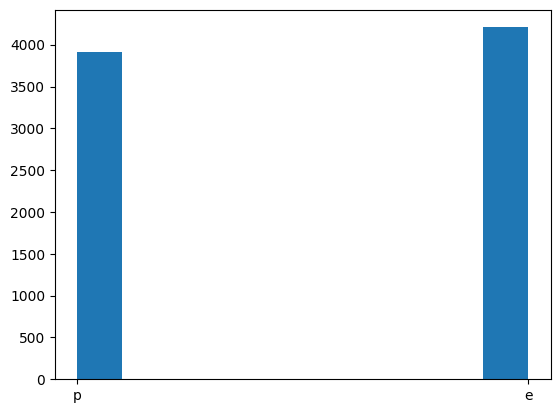

In [ ]:
plt.hist(data["class"])

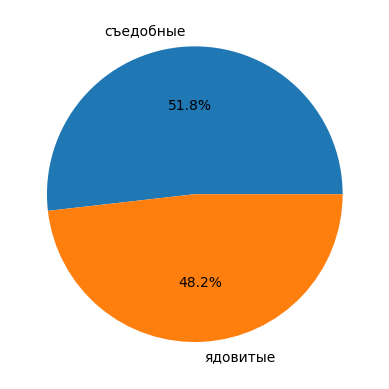

In [ ]:
plt.pie(data["class"].value_counts(), autopct="%1.1f%%");

Дисбаланся классов нет.
А если есть то пишем что он есть, но в рамках экзамена мы не успеваем собрать больше данных или продублировать данные меньшего класса

In [ ]:
data = data.apply(lambda x: pd.factorize(x)[0])

In [ ]:
import seaborn as sns

In [ ]:
data["veil-type"].sum()

0

In [ ]:
data.drop(columns=["veil-type"], inplace=True)

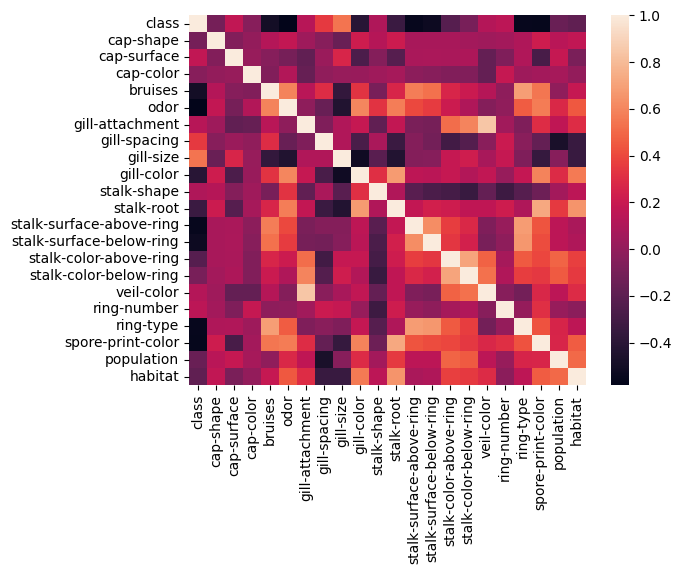

In [ ]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix)
plt.show()

In [ ]:
# import seaborn as sns

# numeric_variables = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

# # Вычисление коэффициента корреляции Пирсона
# correlation = df[numeric_variables].corrwith(df['class'])

# # Визуализация коэффициента корреляции
# sns.barplot(x=correlation.values, y=correlation.index)
# plt.xlabel('Correlation')
# plt.ylabel('Variables')
# plt.title('Correlation with Class') #коэффициент корреляции Пирсона
# plt.show()

Большое всего коррелируют такие-то признаки (светлые).
Лучше всего коррелирует с целевой переменной ...


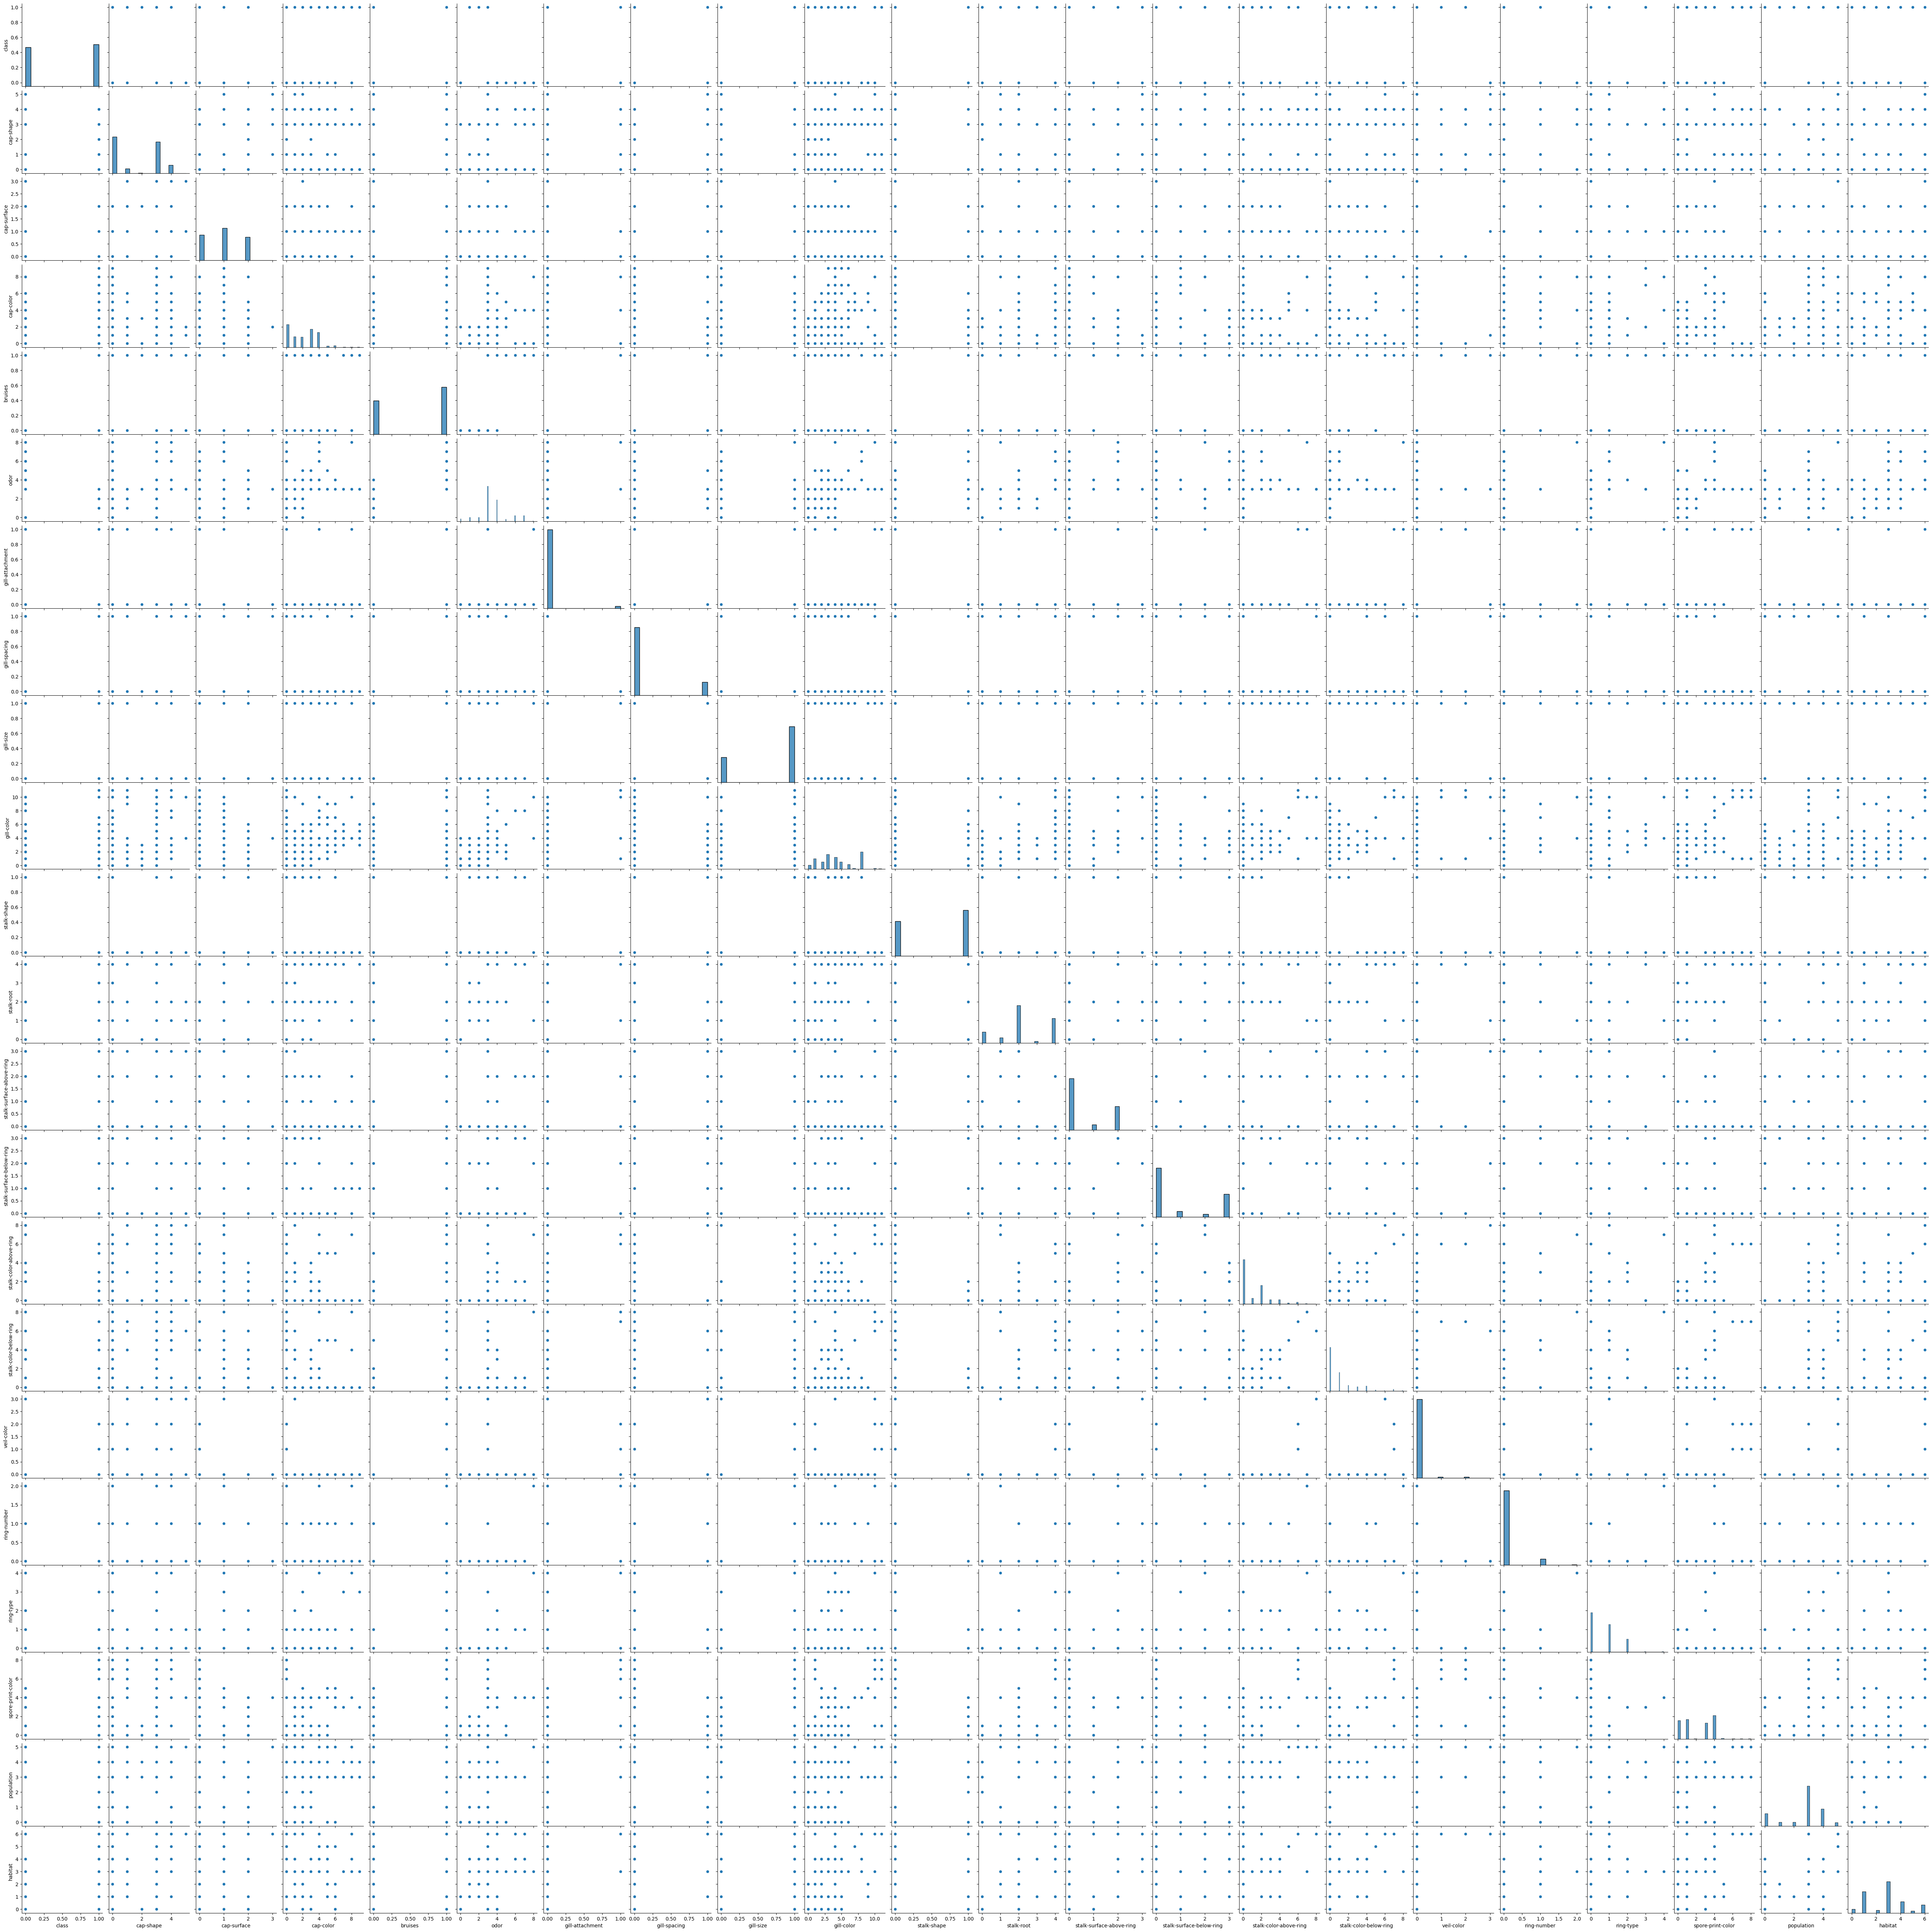

In [ ]:
sns.pairplot(data)
plt.show()

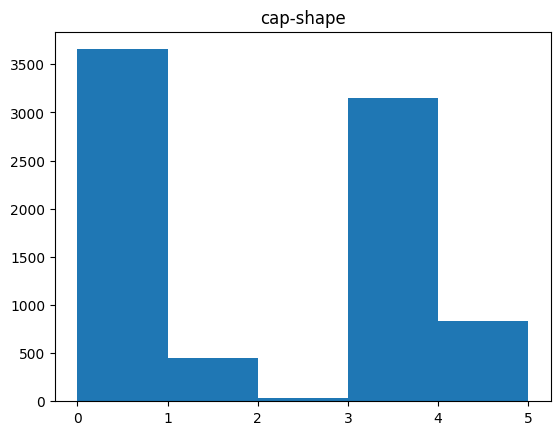

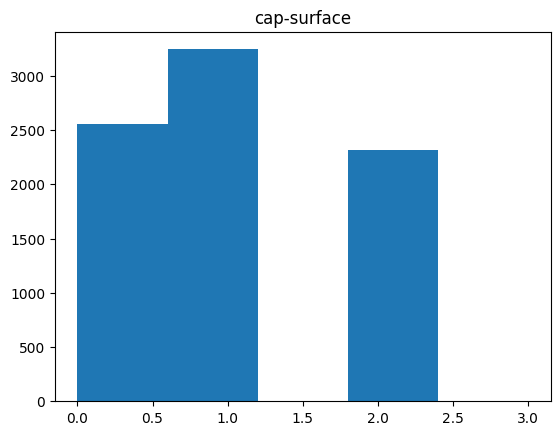

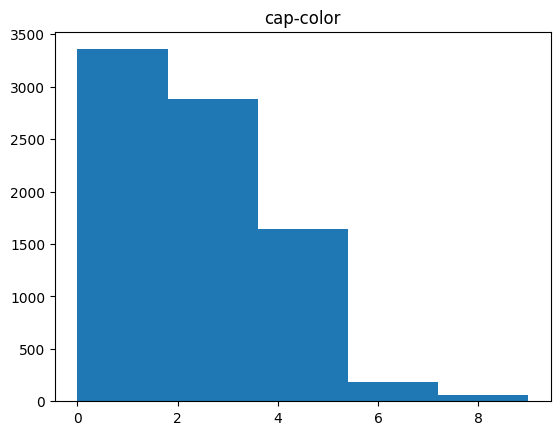

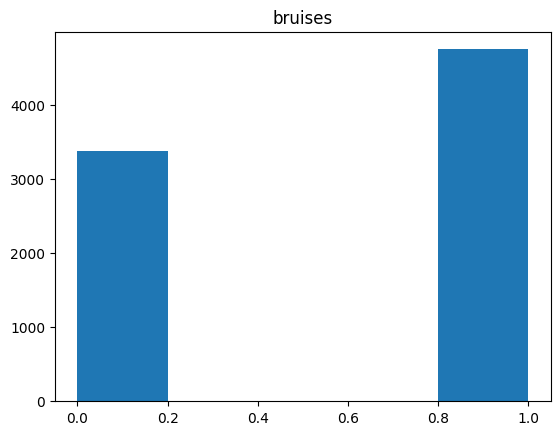

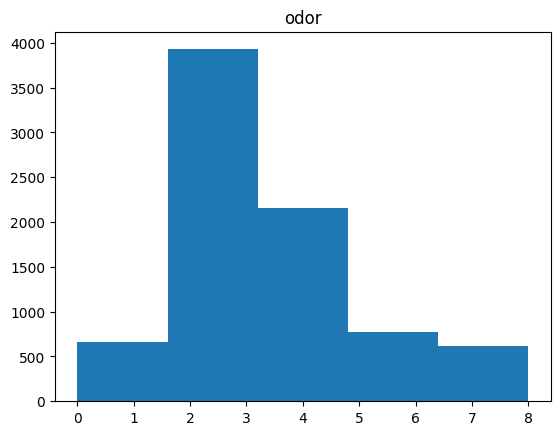

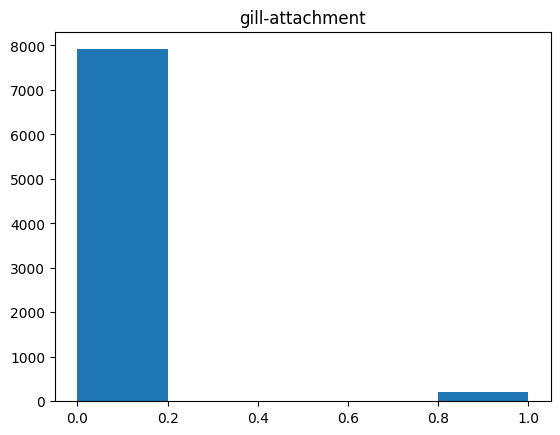

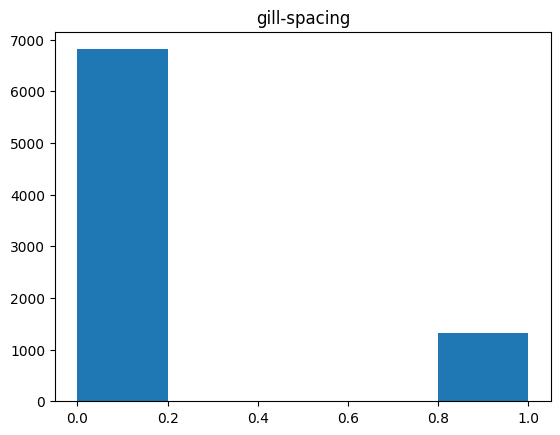

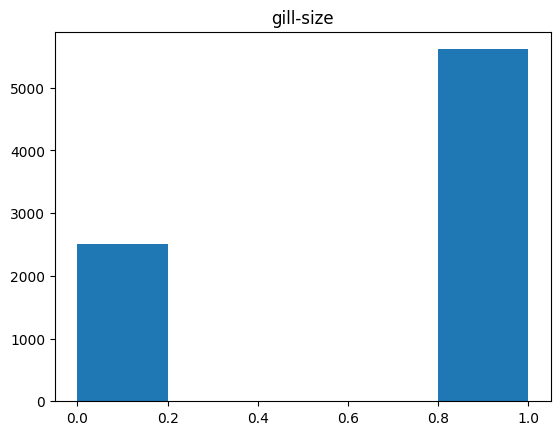

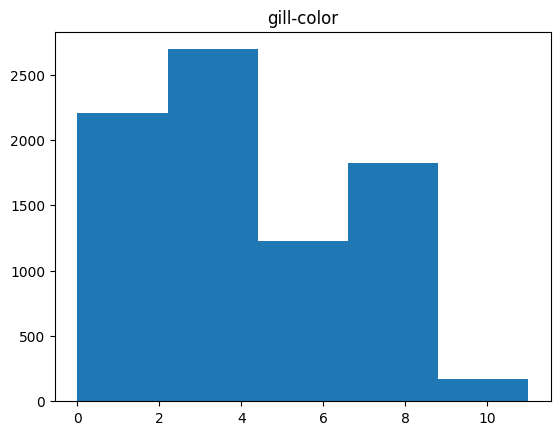

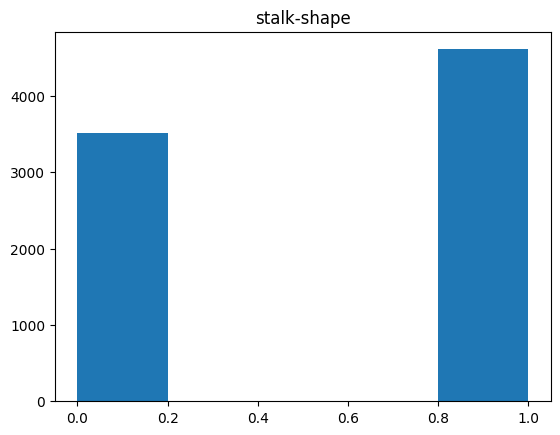

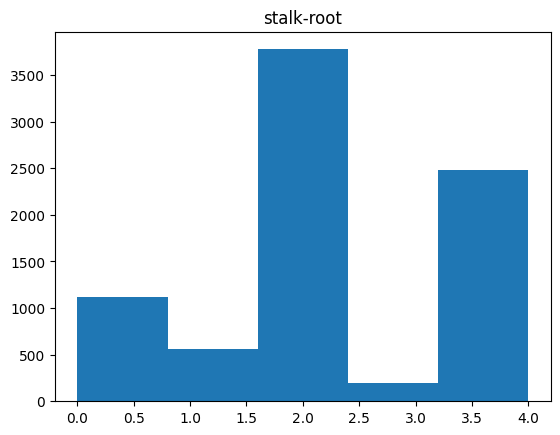

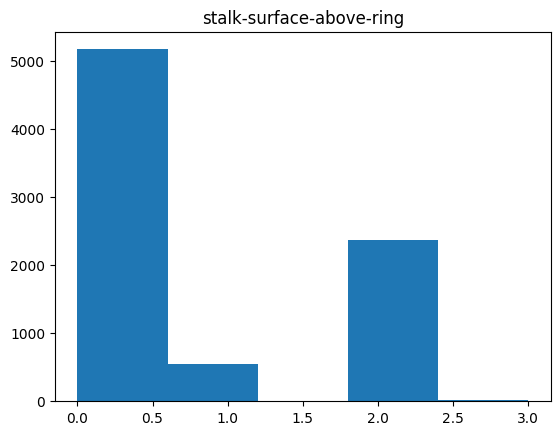

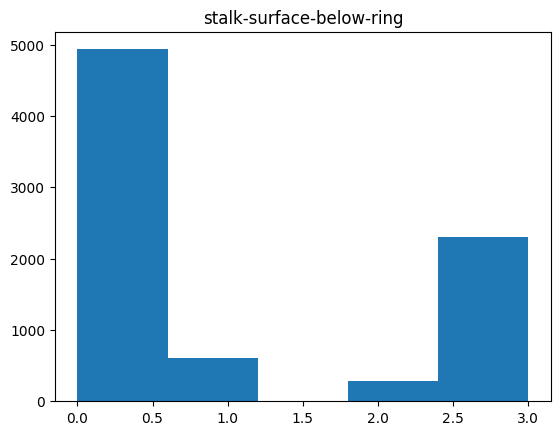

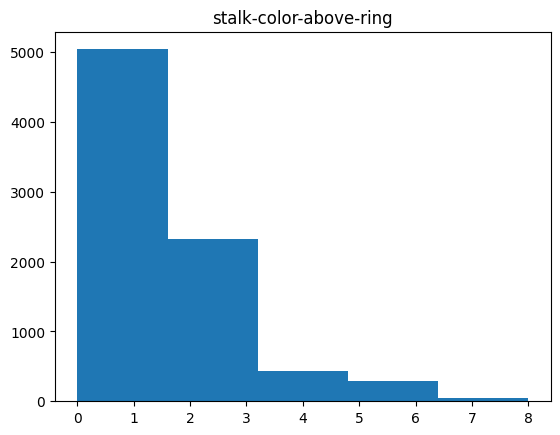

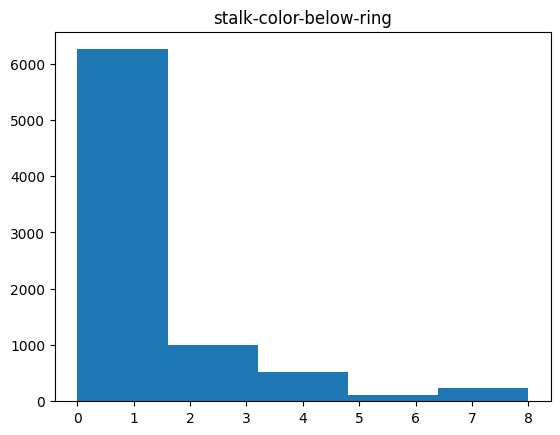

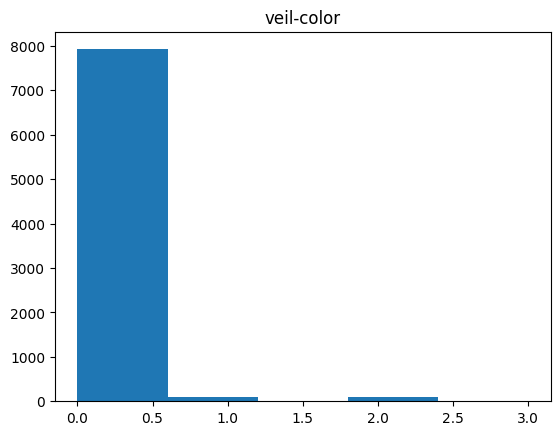

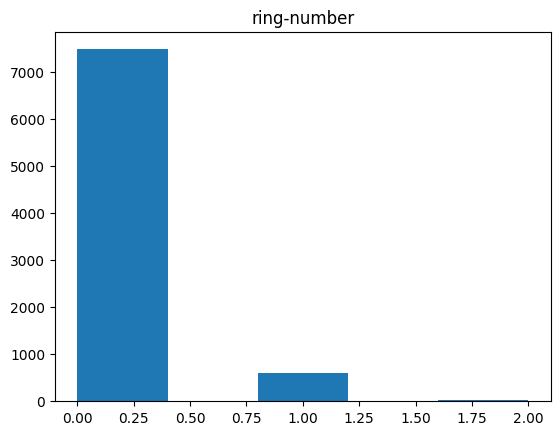

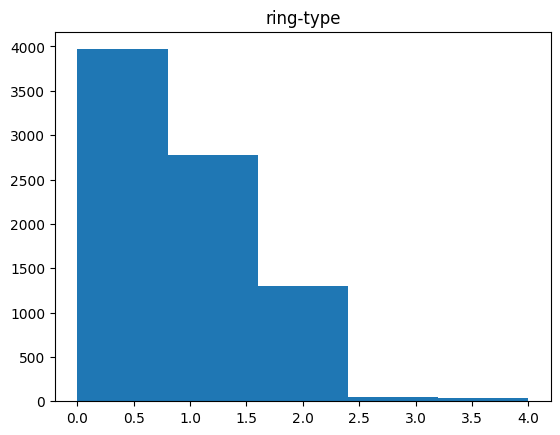

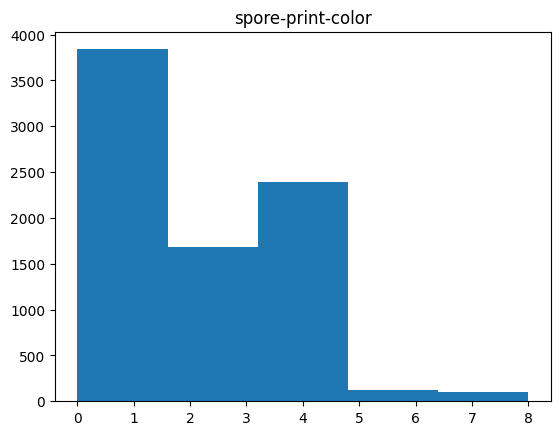

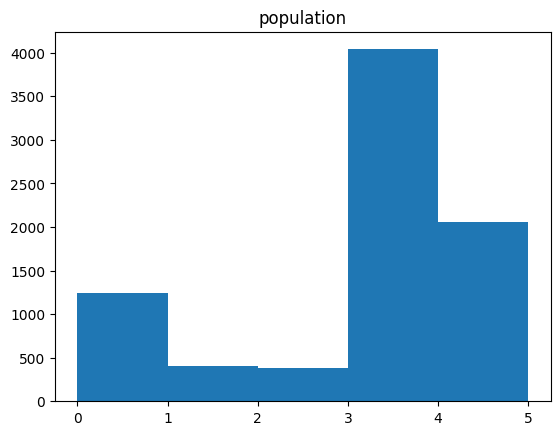

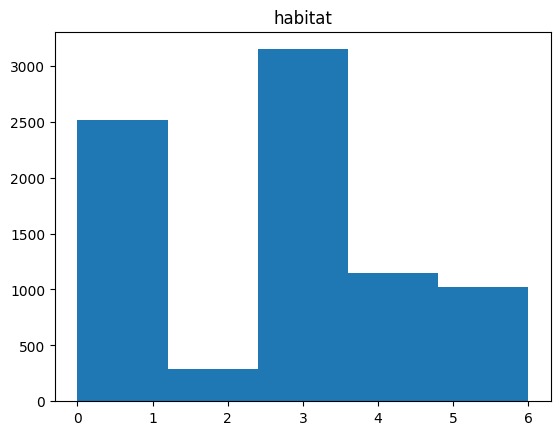

In [ ]:
for col in data.drop(columns=["class"]):
  plt.hist(data[col], bins=5)
  plt.title(col)
  plt.show()

In [ ]:
X, y = data.drop(columns=["class"]), data["class"]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=3)

In [ ]:
from sklearn.svm import SVR, LinearSVR

In [ ]:
model = SVR()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9843626891264736

Вывод подхожит или нет